In [3]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 2us/step


- predicting the median price of homes in mid 70s given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on
- some values are pro- portions, which take values between 0 and 1; others take values between 1 and 12, oth- ers between 0 and 100, and so on.

In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
 train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [19]:
#Feature-wise normalization 
#(for each feature in the input data (a column in the input data matrix),
#you subtract the mean of the feature and divide by the standard deviation, 
#so that the feature is centered around 0 and has a unit standard deviation.)

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean 
test_data /= std

In [20]:
#never use test data for data normalization


In [24]:
#Define the Model 
#Because you’ll need to instantiate the same model multiple times, you use a function to construct it.

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#ends with single unit and No Activation (linear layer) for scalar regression 
#Network is free to predict value at any range not between (0 and 1)
#using Mean absolute error because absolute value of the difference between the predictions and the targets.

In [26]:
#Using K-fold cross validation (used for smaller data inputs because you wont be able to use validation set due to high variance)
#consists of splitting available data into K partitions typically 4 or 5 instanti- ating K identical models, and training each one on K – 1 partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the K validation scores obtained. 

import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [32]:


for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] #Prepares the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate( #Prepares the training data: data from all other partitions
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
model = build_model() #Builds the Keras model (already compiled)
model.fit(partial_train_data, partial_train_targets, #Trains the model(in silent mode, verbose = 0)
        epochs= 100, batch_size=1, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) #Evaluates the model on validation data
all_scores.append(val_mae)



processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [31]:
all_scores

[2.5525853633880615, 2.7083399295806885]

In [30]:
np.mean(all_scores)

2.630462646484375

In [33]:
#mean showing we are off by $2,600 in our price ranges of $10,000 to $50,000 which is significant. 

In [37]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] #Prepares the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate( #Prepares the training data: data from all other partitions
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
model = build_model() #Builds the Keras model (already compiled)
history = model.fit(partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),#Trains the model(in silent mode, verbose = 0)
        epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [38]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

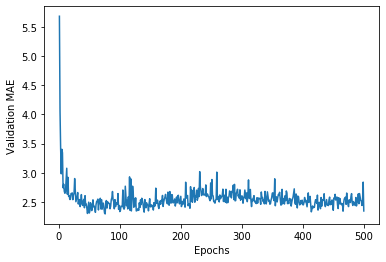

In [41]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

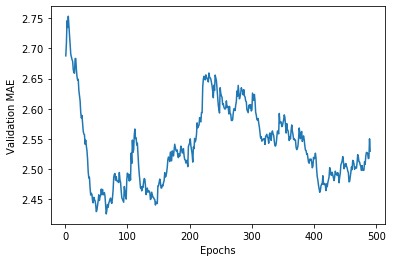

In [42]:
def smooth_curve(points, factor=0.9): 
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

In [43]:
model = build_model() #Gets a fresh, compiled model
model.fit(train_data, train_targets, #Trains it on the entirety of the data
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 310us/step


In [44]:
test_mae_score

2.6911582946777344

Regression is done using different loss functions than what we used for classifi- cation. Mean squared error (MSE) is a loss function commonly used for regres- sion.
 Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).
 When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
 When there is little data available, using K-fold validation is a great way to reli- ably evaluate a model.
 When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting.